**<h1>Analiza Ekstraklasy od sezonu 2012/2013 do 2024/2025</h1>**


## **Opis projektu:** ##
Projekt przestawia szczegółową analize wszystkich meczów z ostatnich 13 sezonów w najlepszej polskiej lidze piłki nożnej czyli Ekstraklasy.
Zbiór danych został pobrany z realnych danych ze strony: [Football data](https://www.football-data.co.uk/poland.php)

**Logo Ekstraklasy:**

<img src="https://www.tygodnikprzeglad.pl/wp-content/uploads/2021/11/ekstraklasa-typy-dnia-800x500_c.jpg" alt="Logo ekstraklasy" width="400">


### **Opis kolumn:** ###

**Country** – kraj (tu: zawsze "Poland")

**League** – nazwa ligi (np. "Ekstraklasa")

**Season** – sezon rozgrywkowy (np. "2012/2013")

**Date** – data meczu

**Time** – godzina rozpoczęcia meczu

**Drużyny i wynik:**

**Home** – drużyna gospodarzy

**Away** – drużyna gości

**HG** – liczba goli zdobytych przez gospodarzy (Home Goals)

**AG** – liczba goli zdobytych przez gości (Away Goals)

**Res** – wynik końcowy z perspektywy gospodarza:

**"H"** – wygrana gospodarzy (Home win)

**"D"** – remis (Draw)

**"A"** – wygrana gości (Away win)

**Kursy bukmacherskie (od firm bukmacherskich):**

**Pinnacle Sports (PS):**

**PSCH** – kurs na wygraną gospodarzy

**PSCD** – kurs na remis

**PSCA** – kurs na wygraną gości

**Najwyższe kursy z wielu źródeł:**

**MaxCH** – najwyższy kurs na wygraną gospodarzy

**MaxCD** – najwyższy kurs na remis

**MaxCA** – najwyższy kurs na wygraną gości

**Średnie kursy:**

**AvgCH** – średni kurs na wygraną gospodarzy

**AvgCD** – średni kurs na remis

**AvgCA** – średni kurs na wygraną gości

**Betfair Exchange (prawdopodobnie rynki giełdowe zakładów):**

**BFECH** – kurs Betfair na gospodarzy

**BFECD** – kurs Betfair na remis

**BFECA** – kurs Betfair na gości  
(Uwaga: dostępne tylko dla ok. 300 meczów – dużo wartości NaN)

**Wgrywanie bibliotek**

In [3]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
FIG_DIR = "./figures"
EXP_DIR = "./exports"
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(EXP_DIR, exist_ok=True)

def savefig(path, fig):
    fig.tight_layout()
    fig.savefig(path, dpi=160, bbox_inches="tight")
    plt.close(fig)
    print("PNG:", path)



In [4]:
df = pd.read_excel(r"C:\Users\huber\Downloads\POL.xlsx")
df

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
0,Poland,Ekstraklasa,2012/2013,2012-08-17,17:00:00,Pogon Szczecin,Zaglebie,4,0,H,...,2.47,3.30,3.30,2.50,3.01,3.11,2.34,NaN,NaN,NaN
1,Poland,Ekstraklasa,2012/2013,2012-08-17,19:30:00,Piast Gliwice,Gornik Z.,1,2,A,...,2.98,2.78,3.25,3.30,2.56,3.05,2.78,NaN,NaN,NaN
2,Poland,Ekstraklasa,2012/2013,2012-08-18,12:30:00,Jagiellonia,Podbeskidzie,2,1,H,...,5.63,1.85,3.60,5.63,1.74,3.42,4.72,NaN,NaN,NaN
3,Poland,Ekstraklasa,2012/2013,2012-08-18,14:45:00,Widzew Lodz,Slask Wroclaw,2,1,H,...,2.95,2.80,3.20,2.95,2.66,3.03,2.66,NaN,NaN,NaN
4,Poland,Ekstraklasa,2012/2013,2012-08-18,17:00:00,Lech Poznan,Ruch,4,0,H,...,3.89,2.12,3.30,4.00,2.05,3.16,3.61,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Legia,Stal Mielec,2,2,D,...,7.60,1.44,5.50,7.70,1.36,5.29,7.12,1.40,5.60,8.80
3772,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Puszcza,Slask Wroclaw,1,1,D,...,2.05,3.30,4.00,2.05,3.24,3.88,2.01,3.55,4.10,2.08
3773,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Radomiak Radom,Motor Lublin,2,3,A,...,3.86,1.99,3.75,4.05,1.94,3.54,3.73,2.02,3.80,3.90
3774,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Rakow,Widzew Lodz,2,1,H,...,11.81,1.29,5.80,11.81,1.27,5.47,10.29,1.30,6.20,13.50


In [120]:
pd.set_option('display.max_columns', 25)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776 entries, 0 to 3775
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  3776 non-null   object        
 1   League   3776 non-null   object        
 2   Season   3776 non-null   object        
 3   Date     3776 non-null   datetime64[ns]
 4   Time     3776 non-null   object        
 5   Home     3776 non-null   object        
 6   Away     3776 non-null   object        
 7   HG       3776 non-null   int64         
 8   AG       3776 non-null   int64         
 9   Res      3776 non-null   object        
 10  PSCH     3775 non-null   float64       
 11  PSCD     3775 non-null   float64       
 12  PSCA     3775 non-null   float64       
 13  MaxCH    3776 non-null   float64       
 14  MaxCD    3776 non-null   float64       
 15  MaxCA    3776 non-null   float64       
 16  AvgCH    3776 non-null   float64       
 17  AvgCD    3776 non-null   float64 

In [122]:
df.shape

(3776, 22)

In [123]:
df.head(6)

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PSCH,PSCD,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
0,Poland,Ekstraklasa,2012/2013,2012-08-17,17:00:00,Pogon Szczecin,Zaglebie,4,0,H,3.23,3.21,2.47,3.30,3.30,2.50,3.01,3.11,2.34,NaN,NaN,NaN
1,Poland,Ekstraklasa,2012/2013,2012-08-17,19:30:00,Piast Gliwice,Gornik Z.,1,2,A,2.72,3.12,2.98,2.78,3.25,3.30,2.56,3.05,2.78,NaN,NaN,NaN
2,Poland,Ekstraklasa,2012/2013,2012-08-18,12:30:00,Jagiellonia,Podbeskidzie,2,1,H,1.74,3.60,5.63,1.85,3.60,5.63,1.74,3.42,4.72,NaN,NaN,NaN
3,Poland,Ekstraklasa,2012/2013,2012-08-18,14:45:00,Widzew Lodz,Slask Wroclaw,2,1,H,2.70,3.11,2.95,2.80,3.20,2.95,2.66,3.03,2.66,NaN,NaN,NaN
4,Poland,Ekstraklasa,2012/2013,2012-08-18,17:00:00,Lech Poznan,Ruch,4,0,H,2.12,3.29,3.89,2.12,3.30,4.00,2.05,3.16,3.61,NaN,NaN,NaN
5,Poland,Ekstraklasa,2012/2013,2012-08-19,13:30:00,Wisla,GKS Belchatow,2,1,H,1.50,4.13,8.31,1.55,4.20,8.31,1.50,3.88,6.48,NaN,NaN,NaN


In [124]:
df.tail(6)

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PSCH,PSCD,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
3770,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Lechia Gdansk,GKS Katowice,2,3,A,1.97,3.98,3.42,2.01,4.10,3.55,1.93,3.91,3.43,2.04,4.10,3.55
3771,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Legia,Stal Mielec,2,2,D,1.35,5.47,7.60,1.44,5.50,7.70,1.36,5.29,7.12,1.40,5.60,8.80
3772,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Puszcza,Slask Wroclaw,1,1,D,3.25,3.93,2.05,3.30,4.00,2.05,3.24,3.88,2.01,3.55,4.10,2.08
3773,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Radomiak Radom,Motor Lublin,2,3,A,1.93,3.64,3.86,1.99,3.75,4.05,1.94,3.54,3.73,2.02,3.80,3.90
3774,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Rakow,Widzew Lodz,2,1,H,1.26,5.64,11.81,1.29,5.80,11.81,1.27,5.47,10.29,1.30,6.20,13.50
3775,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Zaglebie,Cracovia,1,2,A,2.77,3.45,2.51,2.77,3.55,2.56,2.67,3.45,2.49,2.86,3.65,2.60


**Filtr - gospodarz, gość, data**

In [125]:
df.filter(items=['Home', 'Away', 'Date'], axis=1)

,Home,Away,Date
0,Pogon Szczecin,Zaglebie,2012-08-17
1,Piast Gliwice,Gornik Z.,2012-08-17
2,Jagiellonia,Podbeskidzie,2012-08-18
3,Widzew Lodz,Slask Wroclaw,2012-08-18
4,Lech Poznan,Ruch,2012-08-18
...,...,...,...
3771,Legia,Stal Mielec,2025-05-24
3772,Puszcza,Slask Wroclaw,2025-05-24
3773,Radomiak Radom,Motor Lublin,2025-05-24
3774,Rakow,Widzew Lodz,2025-05-24


In [126]:
first_season = df["Season"].iloc[0]
last_season = df["Season"].iloc[3775] # Opcjonalnie -1    
print("First season:", first_season) 
print("Last season:", last_season)

First season: 2012/2013
Last season: 2024/2025


In [127]:
middle_index = len(df) // 2
print("Middle index:", middle_index)
df.iloc[1888]

Middle index: 1888


Country                 Poland
League             Ekstraklasa
Season               2018/2019
Date       2019-02-15 00:00:00
Time                  17:00:00
Home            Pogon Szczecin
Away                 Gornik Z.
HG                           3
AG                           1
Res                          H
PSCH                      1.75
PSCD                      3.67
PSCA                      5.26
MaxCH                     1.75
MaxCD                      3.8
MaxCA                     5.26
AvgCH                     1.71
AvgCD                     3.62
AvgCA                     4.81
BFECH                      NaN
BFECD                      NaN
BFECA                      NaN
Name: 1888, dtype: object

**Zdarzenia z najniższym kursem na gospodarzy - najbardziej pewne mecze gdzie gospodarza ma wygrać**

In [128]:
df[df["PSCH"] <= 1.2]

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PSCH,PSCD,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
1334,Poland,Ekstraklasa,2016/2017,2017-03-19,14:30:00,Lech Poznan,Leczna,0,0,D,1.20,7.21,17.87,1.20,7.62,20.00,1.18,6.51,15.22,NaN,NaN,NaN
2782,Poland,Ekstraklasa,2021/2022,2022-03-19,19:00:00,Lech Poznan,Jagiellonia,3,0,H,1.20,7.22,15.11,1.24,7.30,16.00,1.18,6.78,13.94,NaN,NaN,NaN
2813,Poland,Ekstraklasa,2021/2022,2022-04-20,17:00:00,Lech Poznan,Leczna,3,0,H,1.16,7.79,23.43,1.16,8.00,23.43,1.14,7.30,18.64,NaN,NaN,NaN
2820,Poland,Ekstraklasa,2021/2022,2022-04-24,11:30:00,Lech Poznan,Stal Mielec,3,1,H,1.20,7.11,16.98,1.22,7.11,17.07,1.19,6.54,13.76,NaN,NaN,NaN
2962,Poland,Ekstraklasa,2022/2023,2022-10-10,17:00:00,Rakow,Legnica,1,0,H,1.16,7.87,18.67,1.23,7.87,18.67,1.16,6.95,15.49,NaN,NaN,NaN
3066,Poland,Ekstraklasa,2022/2023,2023-03-10,19:30:00,Rakow,Slask Wroclaw,4,1,H,1.19,6.90,16.98,1.27,7.30,19.50,1.20,6.16,14.76,NaN,NaN,NaN


**Mecze gdzie mocnymi faworytami byli gospodarze (kursy mniejsze niż 1.30) a przegrwywali mecz**

In [129]:
df[(df["PSCH"] < 1.3) & (df["Res"] == "A")]

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PSCH,PSCD,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
1301,Poland,Ekstraklasa,2016/2017,2017-02-19,17:00:00,Legia,Ruch,1,3,A,1.26,6.28,13.56,1.27,6.30,14.36,1.24,5.71,11.36,NaN,NaN,NaN
3276,Poland,Ekstraklasa,2023/2024,2023-10-29,14:00:00,Legia,Stal Mielec,1,3,A,1.28,5.96,11.47,1.39,6.02,11.47,1.28,5.43,9.52,NaN,NaN,NaN
3300,Poland,Ekstraklasa,2023/2024,2023-11-25,16:30:00,Pogon Szczecin,Stal Mielec,2,3,A,1.28,6.06,10.56,1.32,6.20,11.00,1.27,5.58,9.63,NaN,NaN,NaN


**Mecze z udziałem Legii, Lecha i Cracovii**

In [130]:
teams = ["Legia", "Lech Poznan", "Cracovia"]
df[(df["Home"].isin(teams)) | (df["Away"].isin(teams))]

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PSCH,PSCD,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
4,Poland,Ekstraklasa,2012/2013,2012-08-18,17:00:00,Lech Poznan,Ruch,4,0,H,2.12,3.29,3.89,2.12,3.30,4.00,2.05,3.16,3.61,NaN,NaN,NaN
6,Poland,Ekstraklasa,2012/2013,2012-08-19,16:00:00,Legia,Korona Kielce,4,0,H,1.63,3.67,7.21,1.70,3.71,7.22,1.63,3.49,5.66,NaN,NaN,NaN
12,Poland,Ekstraklasa,2012/2013,2012-08-25,17:00:00,Polonia Warszawa,Lech Poznan,1,2,A,2.97,3.20,2.62,3.10,3.25,2.74,2.83,3.06,2.48,NaN,NaN,NaN
14,Poland,Ekstraklasa,2012/2013,2012-08-26,16:00:00,GKS Belchatow,Legia,0,2,A,4.78,3.38,1.93,4.78,3.45,2.00,3.92,3.28,1.93,NaN,NaN,NaN
21,Poland,Ekstraklasa,2012/2013,2012-09-02,13:30:00,Lech Poznan,Gornik Z.,0,0,D,1.65,3.88,5.98,1.65,4.09,6.75,1.58,3.58,5.99,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3764,Poland,Ekstraklasa,2024/2025,2025-05-18,13:45:00,Cracovia,Legia,3,1,H,2.79,3.62,2.41,2.94,3.65,2.48,2.75,3.53,2.39,2.94,3.70,2.52
3765,Poland,Ekstraklasa,2024/2025,2025-05-18,16:30:00,GKS Katowice,Lech Poznan,2,2,D,5.27,4.28,1.58,5.54,4.35,1.63,5.24,4.10,1.59,5.90,4.30,1.66
3769,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Lech Poznan,Piast Gliwice,1,0,H,1.33,5.27,8.47,1.38,5.60,9.00,1.34,5.18,8.20,1.36,5.90,10.00
3771,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Legia,Stal Mielec,2,2,D,1.35,5.47,7.60,1.44,5.50,7.70,1.36,5.29,7.12,1.40,5.60,8.80


**Mecze najbardziej bramkoszczelne w przypadku gospodarzy i gośći minimum po 4 bramki dla zespołu u siebie i na wyjeździe**

In [131]:
specific_match=df[(df['HG'] >= 4) & (df['AG'] >= 4)]
specific_match

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PSCH,PSCD,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
206,Poland,Ekstraklasa,2012/2013,2013-05-12,16:00:00,Lechia Gdansk,Ruch,4,4,D,2.38,2.94,3.77,2.38,3.25,3.77,2.26,3.05,3.23,NaN,NaN,NaN
520,Poland,Ekstraklasa,2013/2014,2014-05-27,19:30:00,Jagiellonia,Korona Kielce,4,4,D,2.73,3.25,2.81,2.73,3.30,2.92,2.50,3.17,2.77,NaN,NaN,NaN
2011,Poland,Ekstraklasa,2018/2019,2019-05-18,14:30:00,Wisla,Legnica,4,5,A,2.54,4.05,2.56,2.58,4.05,2.76,2.46,3.62,2.59,NaN,NaN,NaN
2084,Poland,Ekstraklasa,2019/2020,2019-09-21,19:00:00,Slask Wroclaw,Zaglebie,4,4,D,2.10,3.43,3.74,2.13,3.60,3.75,2.04,3.35,3.55,NaN,NaN,NaN
2218,Poland,Ekstraklasa,2019/2020,2020-03-07,16:30:00,Zaglebie,Lechia Gdansk,4,4,D,1.73,4.09,4.56,1.93,4.09,4.56,1.80,3.64,4.18,NaN,NaN,NaN
3310,Poland,Ekstraklasa,2023/2024,2023-12-03,11:30:00,Cracovia,Ruch Chorzow,4,4,D,1.67,3.81,5.67,1.76,4.10,6.40,1.62,3.74,5.41,NaN,NaN,NaN
3731,Poland,Ekstraklasa,2024/2025,2025-04-25,17:00:00,Puszcza,Pogon Szczecin,4,5,A,4.77,4.11,1.69,4.77,4.25,1.71,4.58,4.02,1.67,5.1,4.2,1.73


**Najwięcej strzelonych bramek w meczu**

In [132]:
df['TotalGoals'] = df['HG'] + df['AG']
max_goals = df['TotalGoals'].max()
most_goals_matches = df[df['TotalGoals'] == max_goals]
print(f"Najwięcej bramek w jednym meczu: {max_goals}")
most_goals_matches

Najwięcej bramek w jednym meczu: 9


,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PSCH,PSCD,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA,TotalGoals
795,Poland,Ekstraklasa,2014/2015,2015-05-19,19:30:00,Piast Gliwice,GKS Belchatow,6,3,H,1.80,3.69,5.02,1.81,4.10,5.08,1.75,3.52,4.64,NaN,NaN,NaN,9
2011,Poland,Ekstraklasa,2018/2019,2019-05-18,14:30:00,Wisla,Legnica,4,5,A,2.54,4.05,2.56,2.58,4.05,2.76,2.46,3.62,2.59,NaN,NaN,NaN,9
3731,Poland,Ekstraklasa,2024/2025,2025-04-25,17:00:00,Puszcza,Pogon Szczecin,4,5,A,4.77,4.11,1.69,4.77,4.25,1.71,4.58,4.02,1.67,5.10,4.2,1.73,9
3742,Poland,Ekstraklasa,2024/2025,2025-05-03,19:15:00,Lech Poznan,Puszcza,8,1,H,1.31,5.64,9.54,1.32,6.25,10.00,1.28,5.55,9.18,1.32,6.2,10.00,9


**Najbardziej bramkoszczelna drużyna**

In [133]:
home_goals = df.groupby('Home')['HG'].sum()
away_goals = df.groupby('Away')['AG'].sum()
total_scored = home_goals.add(away_goals, fill_value=0)
print ("Najwięcej strzelonych bramek w meczu:")
print(total_scored.sort_values(ascending=False).head(10))

Najwięcej strzelonych bramek w meczu:
Home
Legia             780
Lech Poznan       729
Jagiellonia       676
Pogon Szczecin    632
Slask Wroclaw     584
Piast Gliwice     576
Cracovia          561
Lechia Gdansk     555
Zaglebie          531
Wisla             488
dtype: int64


**Która drużyna zdobyła najwięcej punktów jako gospodarz w badanym okresie?**

In [134]:
df['HomePoints'] = df['Res'].map({'H': 3, 'D': 1, 'A': 0})
home_points = df.groupby('Home')['HomePoints'].sum().sort_values(ascending=False)
print("Najwięcej punktów zdobytych jako gospodarz:")
print(home_points.head(10))

Najwięcej punktów zdobytych jako gospodarz:
Home
Legia             480
Lech Poznan       454
Pogon Szczecin    389
Jagiellonia       389
Piast Gliwice     380
Slask Wroclaw     372
Lechia Gdansk     344
Cracovia          337
Korona Kielce     301
Zaglebie          299
Name: HomePoints, dtype: int64


**Średni kurs na wygraną gospodarzy**

In [135]:
avg_course_to_hometeams = df['PSCH'].mean().__round__(4)
avg_course_to_hometeams


np.float64(2.5073)

**Średni kurs na remis**

In [136]:
avg_course_to_draws = df['PSCD'].mean().__round__(4)
avg_course_to_draws

np.float64(3.6161)

**Średni kurs na wygraną gości**

In [137]:
avg_course_to_awayteams = df['PSCA'].mean().__round__(4)
avg_course_to_awayteams

np.float64(3.8896)

**Średnia ilość bramek na sezon**

In [138]:
df.groupby('Season')[['HG', 'AG']].mean()

,HG,AG
Season,,
2012/2013,1.341667,1.150000
2013/2014,1.540541,1.114865
2014/2015,1.493243,1.175676
2015/2016,1.456081,1.172297
2016/2017,1.577703,1.165541
2017/2018,1.479730,1.158784
2018/2019,1.500000,1.280405
2019/2020,1.516892,1.074324
2020/2021,1.304167,1.150000


**Suma wszystkich bramek na sezon**

In [139]:
df.groupby('Season')[['HG', 'AG']].sum().assign(TotalGoals=lambda x: x['HG'] + x['AG'])

,HG,AG,TotalGoals
Season,,,
2012/2013,322,276,598
2013/2014,456,330,786
2014/2015,442,348,790
2015/2016,431,347,778
2016/2017,467,345,812
2017/2018,438,343,781
2018/2019,444,379,823
2019/2020,449,318,767
2020/2021,313,276,589


In [140]:
df.groupby('Season')[['HG', 'AG']].sum().sum(axis=1).to_frame('TotalGoals')

,TotalGoals
Season,
2012/2013,598
2013/2014,786
2014/2015,790
2015/2016,778
2016/2017,812
2017/2018,781
2018/2019,823
2019/2020,767
2020/2021,589


**Średnie kursy w każdym kolejnym seoznie na wygraną gospodarzy, wygraną gośći i remis**

In [141]:
df.groupby('Season')[['PSCH', 'PSCA','PSCD']].mean().round(2)

,PSCH,PSCA,PSCD
Season,,,
2012/2013,2.47,4.14,3.49
2013/2014,2.50,4.04,3.53
2014/2015,2.46,4.00,3.58
2015/2016,2.50,3.92,3.58
2016/2017,2.50,4.06,3.64
2017/2018,2.41,3.87,3.60
2018/2019,2.38,3.63,3.59
2019/2020,2.42,3.67,3.62
2020/2021,2.69,3.55,3.65


**Najwyższe kursy w poszczegołnych sezonach**

In [142]:
df.groupby('Season')[['PSCH','PSCA','PSCD']].max()

,PSCH,PSCA,PSCD
Season,,,
2012/2013,7.35,17.32,6.54
2013/2014,7.91,12.02,5.68
2014/2015,7.10,13.80,6.75
2015/2016,6.18,15.53,6.20
2016/2017,8.44,17.87,7.21
2017/2018,6.55,11.44,5.41
2018/2019,6.32,11.35,6.61
2019/2020,6.65,15.17,6.84
2020/2021,8.57,12.17,6.13


**Najniższe kursy w poszczegołnych sezonach**

In [143]:
df.groupby('Season')[['PSCH','PSCA','PSCD']].min()

,PSCH,PSCA,PSCD
Season,,,
2012/2013,1.23,1.56,2.90
2013/2014,1.31,1.49,2.91
2014/2015,1.24,1.56,3.01
2015/2016,1.25,1.59,2.92
2016/2017,1.20,1.46,2.99
2017/2018,1.32,1.62,2.88
2018/2019,1.24,1.54,2.94
2019/2020,1.22,1.47,2.96
2020/2021,1.28,1.43,2.91


In [144]:
df

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PSCH,PSCD,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA,TotalGoals,HomePoints
0,Poland,Ekstraklasa,2012/2013,2012-08-17,17:00:00,Pogon Szczecin,Zaglebie,4,0,H,3.23,3.21,2.47,3.30,3.30,2.50,3.01,3.11,2.34,NaN,NaN,NaN,4,3
1,Poland,Ekstraklasa,2012/2013,2012-08-17,19:30:00,Piast Gliwice,Gornik Z.,1,2,A,2.72,3.12,2.98,2.78,3.25,3.30,2.56,3.05,2.78,NaN,NaN,NaN,3,0
2,Poland,Ekstraklasa,2012/2013,2012-08-18,12:30:00,Jagiellonia,Podbeskidzie,2,1,H,1.74,3.60,5.63,1.85,3.60,5.63,1.74,3.42,4.72,NaN,NaN,NaN,3,3
3,Poland,Ekstraklasa,2012/2013,2012-08-18,14:45:00,Widzew Lodz,Slask Wroclaw,2,1,H,2.70,3.11,2.95,2.80,3.20,2.95,2.66,3.03,2.66,NaN,NaN,NaN,3,3
4,Poland,Ekstraklasa,2012/2013,2012-08-18,17:00:00,Lech Poznan,Ruch,4,0,H,2.12,3.29,3.89,2.12,3.30,4.00,2.05,3.16,3.61,NaN,NaN,NaN,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Legia,Stal Mielec,2,2,D,1.35,5.47,7.60,1.44,5.50,7.70,1.36,5.29,7.12,1.40,5.60,8.80,4,1
3772,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Puszcza,Slask Wroclaw,1,1,D,3.25,3.93,2.05,3.30,4.00,2.05,3.24,3.88,2.01,3.55,4.10,2.08,2,1
3773,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Radomiak Radom,Motor Lublin,2,3,A,1.93,3.64,3.86,1.99,3.75,4.05,1.94,3.54,3.73,2.02,3.80,3.90,5,0
3774,Poland,Ekstraklasa,2024/2025,2025-05-24,16:30:00,Rakow,Widzew Lodz,2,1,H,1.26,5.64,11.81,1.29,5.80,11.81,1.27,5.47,10.29,1.30,6.20,13.50,3,3


**Największa ilość bramek strzelona przez gospodarzy i przez gośći w określonym starcie meczu**

In [145]:
df.groupby('Time')[['HG','AG']].max()

,HG,AG
Time,,
11:15:00,3,4
11:30:00,4,4
12:00:00,3,3
12:30:00,4,3
13:30:00,4,3
13:45:00,6,4
14:00:00,6,6
14:30:00,6,5
14:45:00,4,5


**Najwcześniej i najpóźniej rozpoczęty mecz**

In [146]:
maks=df['Time'].max()
min =df['Time'].min()
print("Najpóźniej rozpoczęty mecz (czasu UK):", maks)
print("Najwcześniej rozpoczęy mecz (czasu UK):", min)

Najpóźniej rozpoczęty mecz (czasu UK): 19:45:00
Najwcześniej rozpoczęy mecz (czasu UK): 11:15:00


**Która drużyna strzeliła najwięcej bramek o określonej godzinie - gospodarze**


In [147]:
df.loc[df.groupby('Time')['HG'].idxmax()][['Time', 'Home', 'HG']]


,Time,Home,HG
3736,11:15:00,Korona Kielce,3
2101,11:30:00,LKS Lodz,4
736,12:00:00,Cracovia,3
122,12:30:00,Podbeskidzie,4
45,13:30:00,Gornik Z.,4
3579,13:45:00,Cracovia,6
3334,14:00:00,Cracovia,6
293,14:30:00,Jagiellonia,6
115,14:45:00,Zaglebie,4
235,15:00:00,Legia,5


**Która drużyna strzeliła najwięcej bramek o określonej godzinie - gośćie**


In [148]:
df.iloc[df.groupby('Time')['AG'].idxmax()][['Time', 'Away', 'AG']]

,Time,Away,AG
3618,11:15:00,Gornik Zabrze,4
2229,11:30:00,Korona Kielce,4
516,12:00:00,Gornik Z.,3
74,12:30:00,Ruch,3
53,13:30:00,Pogon Szczecin,3
3506,13:45:00,Cracovia,4
2359,14:00:00,Wisla,6
498,14:30:00,Piast Gliwice,5
67,14:45:00,Polonia Warszawa,5
236,15:00:00,GKS Belchatow,3


**Łączenie tabel Total Goals i HomePoints**

In [149]:
merged = pd.merge(
    total_scored.rename('TotalGoals'),
    home_points.rename('HomePoints'),
    left_index=True,
    right_index=True,
    how='inner'
)
merged.head(10)

,TotalGoals,HomePoints
Home,,
Arka Gdynia,178,101
Cracovia,561,337
GKS Belchatow,59,38
GKS Katowice,49,29
Gornik Z.,461,249
Gornik Zabrze,101,70
Jagiellonia,676,389
Korona Kielce,445,301
LKS Lodz,67,38


**Ilość meczów poszczególnych drużyn**

In [ ]:
home = df['Home'].value_counts().rename("HomeMatches").to_frame()
away = df['Away'].value_counts().rename("AwayMatches").to_frame()

merged = pd.merge(home, away, left_index=True, right_index=True, how='outer').fillna(0)
merged["TotalMatches"] = merged["HomeMatches"] + merged["AwayMatches"]

print(merged.head(10))

               HomeMatches  AwayMatches  TotalMatches
Arka Gdynia             74           74           148
Cracovia               213          212           425
GKS Belchatow           33           34            67
GKS Katowice            17           17            34
Gornik Z.              170          171           341
Gornik Zabrze           38           39            77
Jagiellonia            229          226           455
Korona Kielce          196          195           391
LKS Lodz                35           36            71
Lech Poznan            229          226           455


<h3>WIZUALIZACJE</H3>

**Średnia goli per sezon**

,AvgGoals
Season,
2012/2013,2.491667
2013/2014,2.655405
2014/2015,2.668919
2015/2016,2.628378
2016/2017,2.743243
2017/2018,2.638514
2018/2019,2.780405
2019/2020,2.591216
2020/2021,2.454167


Text(0, 0.5, 'Gole na mecz (średnia)')

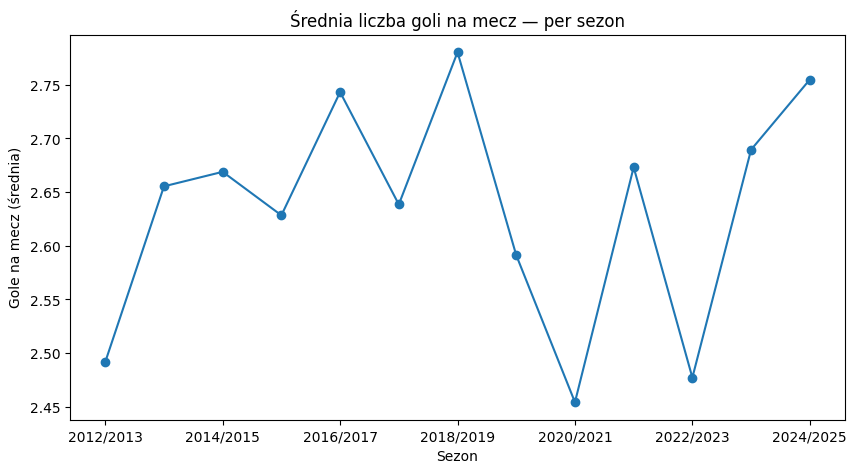

In [10]:
# %%
df['TotalGoals'] = df['HG'] + df['AG']
goals = df.groupby("Season")["TotalGoals"].mean().sort_index()
display(goals.to_frame("AvgGoals"))
goals.to_csv(f"{EXP_DIR}/goals_per_season.csv")

fig, ax = plt.subplots(figsize=(10,5))
goals.plot(ax=ax, marker="o")
ax.set_title("Średnia liczba goli na mecz — per sezon")
ax.set_xlabel("Sezon"); ax.set_ylabel("Gole na mecz (średnia)")



**Udziały wyników H/D/A per sezon**

Res,H,D,A,Total,H_share,D_share,A_share
Season,,,,,,,
2012/2013,97,63,80,240,0.404167,0.262500,0.333333
2013/2014,133,89,74,296,0.449324,0.300676,0.250000
2014/2015,136,80,80,296,0.459459,0.270270,0.270270
2015/2016,120,89,87,296,0.405405,0.300676,0.293919
2016/2017,133,75,88,296,0.449324,0.253378,0.297297
2017/2018,130,84,82,296,0.439189,0.283784,0.277027
2018/2019,133,72,91,296,0.449324,0.243243,0.307432
2019/2020,142,69,85,296,0.479730,0.233108,0.287162
2020/2021,98,66,76,240,0.408333,0.275000,0.316667


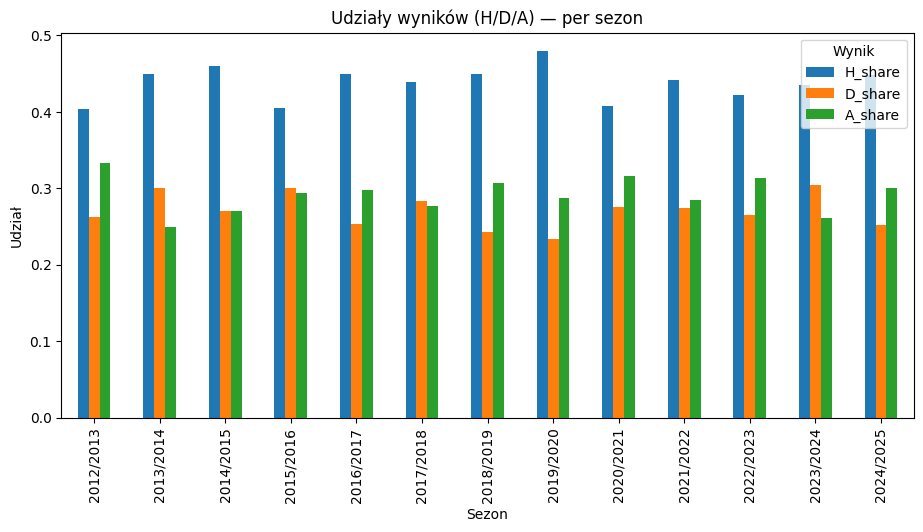

In [23]:
outs = pd.crosstab(df["Season"], df["Res"]).reindex(columns=["H","D","A"], fill_value=0)
outs["Total"] = outs.sum(axis=1)
for c in ["H","D","A"]:
    outs[c+"_share"] = outs[c]/outs["Total"]
display(outs)
outs.to_csv(f"{EXP_DIR}/outcome_shares_per_season.csv")

fig, ax = plt.subplots(figsize=(11,5))
outs[["H_share","D_share","A_share"]].plot(kind="bar", ax=ax)
ax.set_title("Udziały wyników (H/D/A) — per sezon")
ax.set_xlabel("Sezon"); ax.set_ylabel("Udział"); ax.legend(title="Wynik")


**Over/Under 2.5 i 1.5 — trend per sezon**

,Over2.5,Over1.5
Season,,
2012/2013,0.475000,0.750000
2013/2014,0.489865,0.743243
2014/2015,0.510135,0.756757
2015/2016,0.452703,0.760135
2016/2017,0.543919,0.777027
2017/2018,0.506757,0.719595
2018/2019,0.520270,0.777027
2019/2020,0.506757,0.729730
2020/2021,0.445833,0.670833


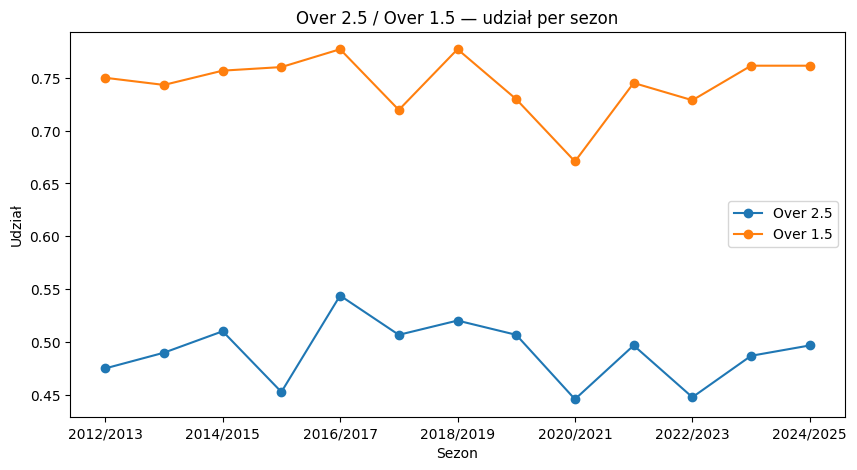

In [13]:
ou = (df.assign(over25=(df["TotalGoals"]>2.5).astype(int),
                over15=(df["TotalGoals"]>1.5).astype(int))
        .groupby("Season")[["over25","over15"]].mean()
        .rename(columns={"over25":"Over2.5","over15":"Over1.5"})
        .sort_index())
display(ou)
ou.to_csv(f"{EXP_DIR}/over_trend_per_season.csv")

fig, ax = plt.subplots(figsize=(10,5))
ou["Over2.5"].plot(ax=ax, marker="o", label="Over 2.5")
ou["Over1.5"].plot(ax=ax, marker="o", label="Over 1.5")
ax.set_title("Over 2.5 / Over 1.5 — udział per sezon")
ax.set_xlabel("Sezon"); ax.set_ylabel("Udział"); ax.legend()

**Najliczniejszy sezon — „wyścig o tytuł” (TOP 4)**

,Pts_H,GF_H,GA_H,Pts_A,GF_A,GA_A,Pts,GF,GA,GD
Home,,,,,,,,,,
Lech Poznan,45,46,12,25,22,19,70,68,31,37
Rakow,33,28,15,36,23,8,69,51,23,28
Jagiellonia,33,33,19,28,23,23,61,56,42,14
Pogon Szczecin,41,36,14,17,23,26,58,59,40,19


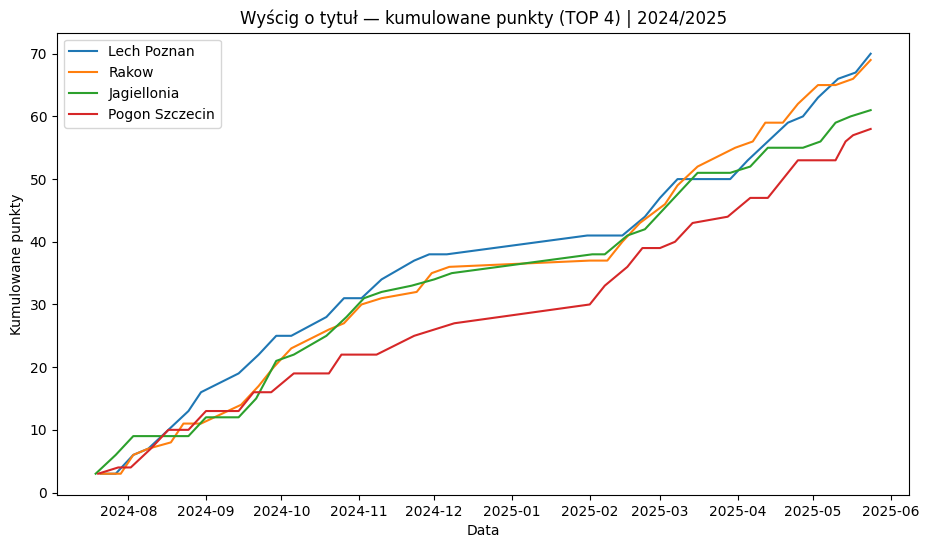

In [19]:
def league_table_for_season(dfin, season):
    d = dfin[dfin["Season"]==season][["Home","Away","HG","AG","Res","Date"]].copy()
    d["H_pts"] = d["Res"].map({"H":3,"D":1,"A":0})
    d["A_pts"] = d["Res"].map({"H":0,"D":1,"A":3})
    home = d.groupby("Home").agg(Pts_H=("H_pts","sum"), GF_H=("HG","sum"), GA_H=("AG","sum"))
    away = d.groupby("Away").agg(Pts_A=("A_pts","sum"), GF_A=("AG","sum"), GA_A=("HG","sum"))
    tab = home.join(away, how="outer").fillna(0)
    tab["Pts"]=tab["Pts_H"]+tab["Pts_A"]; tab["GF"]=tab["GF_H"]+tab["GF_A"]; tab["GA"]=tab["GA_H"]+tab["GA_A"]
    tab["GD"]=tab["GF"]-tab["GA"]
    return tab.sort_values(["Pts","GD","GF"], ascending=[False,False,False])

top_season = df["Season"].value_counts().idxmax()
tab = league_table_for_season(df, top_season)
display(tab.head(4))

fig, ax = plt.subplots(figsize=(11,6))
for team in tab.head(4).index:
    dh = df[(df["Season"]==top_season) & (df["Home"]==team)][["Date","Res"]].copy()
    da = df[(df["Season"]==top_season) & (df["Away"]==team)][["Date","Res"]].copy()
    dh["pts"] = dh["Res"].map({"H":3,"D":1,"A":0})
    da["pts"] = da["Res"].map({"H":0,"D":1,"A":3})
    dteam = pd.concat([dh[["Date","pts"]], da[["Date","pts"]]]).sort_values("Date")
    dteam["cum"] = dteam["pts"].cumsum()
    ax.plot(dteam["Date"], dteam["cum"], label=team)
ax.set_title(f"Wyścig o tytuł — kumulowane punkty (TOP 4) | {top_season}")
ax.set_xlabel("Data"); ax.set_ylabel("Kumulowane punkty"); ax.legend()


**Gole u siebie vs na wyjeździe (per drużyna w tym sezonie)**

,GF_home,GF_away
Lech Poznan,46,22
Pogon Szczecin,36,23
Jagiellonia,33,23
Legia,32,28
Cracovia,30,28
Rakow,28,23
Radomiak Radom,27,21
Puszcza,27,10
Motor Lublin,26,22
GKS Katowice,24,25


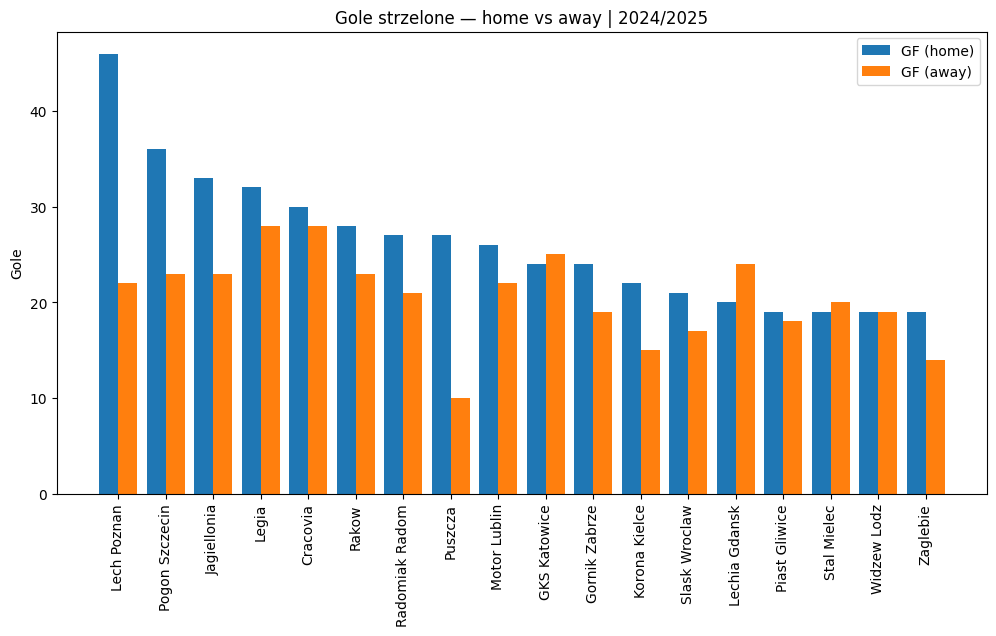

In [22]:
d_season = df[df["Season"]==top_season].copy()
home_goals = d_season.groupby("Home")["HG"].sum().rename("GF_home")
away_goals = d_season.groupby("Away")["AG"].sum().rename("GF_away")
g = pd.concat([home_goals, away_goals], axis=1).fillna(0).sort_values("GF_home", ascending=False)
display(g)

teams = list(g.index)
x = np.arange(len(teams)); width = 0.4
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x - width/2, g["GF_home"].values, width, label="GF (home)")
ax.bar(x + width/2, g["GF_away"].values, width, label="GF (away)")
ax.set_xticks(x); ax.set_xticklabels(teams, rotation=90)
ax.set_title(f"Gole strzelone — home vs away | {top_season}")
ax.set_ylabel("Gole"); ax.legend()

g.to_csv(f"{EXP_DIR}/goals_home_vs_away_{top_season.replace('/','-')}.csv")

**Kalibracja kursów (pH, pD, pA)**

C:\Users\huber\AppData\Local\Temp\ipykernel_12296\1345538109.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = d.groupby("bucket").agg(


,p_mean,obs,n
bucket,,,
"(0.0741, 0.267]",0.215913,0.238095,378
"(0.267, 0.319]",0.295381,0.315650,377
"(0.319, 0.361]",0.341193,0.349206,378
"(0.361, 0.396]",0.378362,0.421751,377
"(0.396, 0.426]",0.410921,0.412698,378
"(0.426, 0.458]",0.441658,0.432361,377
"(0.458, 0.491]",0.474314,0.480106,377
"(0.491, 0.539]",0.514665,0.484127,378
"(0.539, 0.605]",0.570091,0.551724,377


C:\Users\huber\AppData\Local\Temp\ipykernel_12296\1345538109.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = d.groupby("bucket").agg(


,p_mean,obs,n
bucket,,,
"(0.121, 0.231]",0.203633,0.208995,378
"(0.231, 0.251]",0.242070,0.254642,377
"(0.251, 0.264]",0.258778,0.240741,378
"(0.264, 0.273]",0.269069,0.259947,377
"(0.273, 0.28]",0.276476,0.248677,378
"(0.28, 0.285]",0.282265,0.297082,377
"(0.285, 0.29]",0.287709,0.331565,377
"(0.29, 0.296]",0.292906,0.277778,378
"(0.296, 0.305]",0.299802,0.289125,377


C:\Users\huber\AppData\Local\Temp\ipykernel_12296\1345538109.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = d.groupby("bucket").agg(


,p_mean,obs,n
bucket,,,
"(0.0403, 0.159]",0.123255,0.119048,378
"(0.159, 0.199]",0.180171,0.172414,377
"(0.199, 0.232]",0.215996,0.246032,378
"(0.232, 0.259]",0.246048,0.251989,377
"(0.259, 0.284]",0.271154,0.320106,378
"(0.284, 0.311]",0.297052,0.267905,377
"(0.311, 0.343]",0.326739,0.312997,377
"(0.343, 0.387]",0.365081,0.359788,378
"(0.387, 0.449]",0.415930,0.376658,377


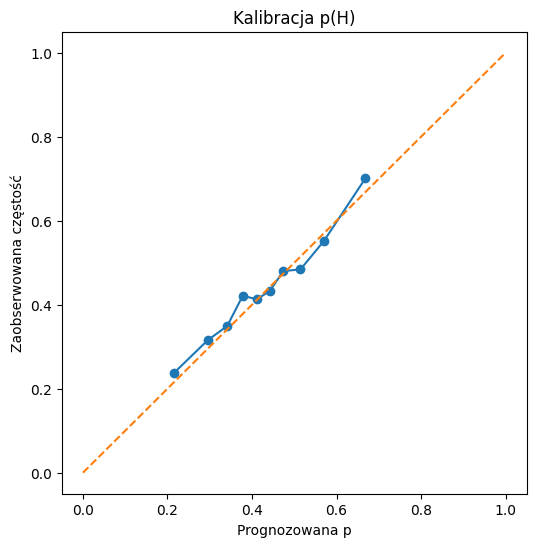

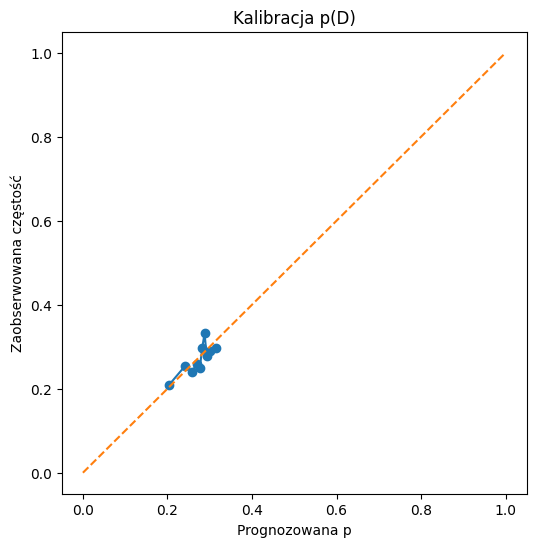

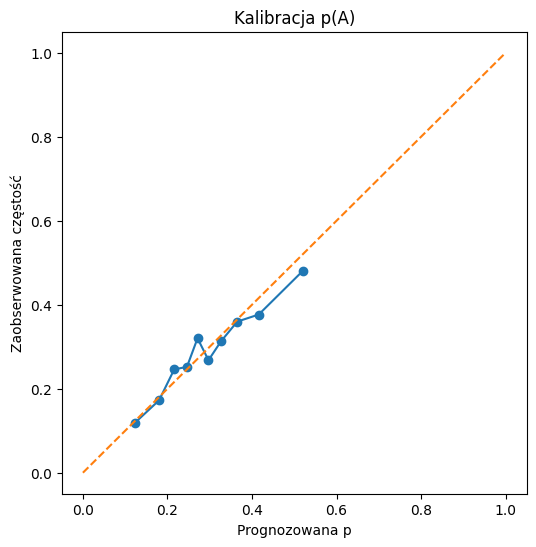

In [25]:
if {"PSCH","PSCD","PSCA"} <= set(df.columns):
    denom = (1/df["PSCH"]) + (1/df["PSCD"]) + (1/df["PSCA"])
    df["pH"] = (1/df["PSCH"])/denom
    df["pD"] = (1/df["PSCD"])/denom
    df["pA"] = (1/df["PSCA"])/denom

    def calib(prob_col, letter, outname):
        d = df[[prob_col,"Res"]].dropna()
        if d.empty: return
        d["bucket"] = pd.qcut(d[prob_col], q=10, duplicates="drop")
        grp = d.groupby("bucket").agg(
            p_mean=(prob_col,"mean"),
            obs=("Res", lambda s:(s==letter).mean()),
            n=("Res","size")
        ).sort_values("p_mean")
        display(grp)
        fig, ax = plt.subplots(figsize=(6,6))
        ax.plot(grp["p_mean"], grp["obs"], marker="o")
        ax.plot([0,1],[0,1], linestyle="--")
        ax.set_title(f"Kalibracja p({letter})"); ax.set_xlabel("Prognozowana p"); ax.set_ylabel("Zaobserwowana częstość")
        grp.to_csv(f"{EXP_DIR}/{outname}.csv")

    calib("pH","H","calibration_home_prob")
    calib("pD","D","calibration_draw_prob")
    calib("pA","A","calibration_away_prob")


**p(H) vs różnica bramek (scatter)**

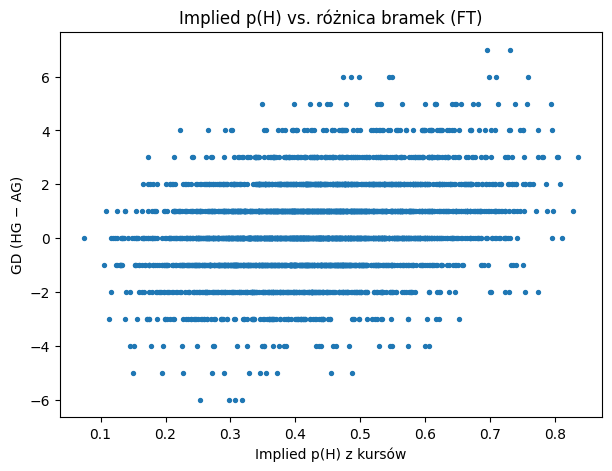

In [28]:
if "pH" in df.columns:
    df["gd"] = df["HG"] - df["AG"]
    fig, ax = plt.subplots(figsize=(7,5))
    ax.scatter(df["pH"], df["gd"], s=8)
    ax.set_title("Implied p(H) vs. różnica bramek (FT)")
    ax.set_xlabel("Implied p(H) z kursów"); ax.set_ylabel("GD (HG − AG)")
